In [45]:
#Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import warnings
warnings.filterwarnings("ignore")


In [46]:
df_data = pd.read_csv('DATA_sumselbabel.csv', delimiter=';')
df_data.head()

,score,content
0,2,Aplikasi sering keluar sendiri. Baru mau sudah...
1,1,"Tolong diperbaiki lagi aplikasinya, hampir set..."
2,1,"Ribet, Aktivasi harus ke bank padahal BNI mobi..."
3,1,"2024, transfer rempong, kalau lagi tf pembayar..."
4,3,M-banking sering eror minta aktivasi ulang dan...


In [47]:
def case_folding(text):
      lower_word = text.lower()
      return lower_word
df_data['case_folding']= df_data['content'].str.lower()

print(df_data['case_folding'])

0       aplikasi sering keluar sendiri. baru mau sudah...
1       tolong diperbaiki lagi aplikasinya, hampir set...
2       ribet, aktivasi harus ke bank padahal bni mobi...
3       2024, transfer rempong, kalau lagi tf pembayar...
4       m-banking sering eror minta aktivasi ulang dan...
                              ...                        
2980                                          cukup keren
2981                                    mudah aplikasinya
2982    tidak bisam daftar aktivasi padahal sudah masu...
2983                                       susah download
2984                                                  sip
Name: case_folding, Length: 2985, dtype: object


In [48]:
def remove_play_special(case_folding):
      if isinstance(case_folding, float):
          return " "
      else:
        text = case_folding.replace('\\t'," ").replace('\\n'," ").replace('\\'," ")
        text = text.encode('ascii', 'replace').decode('ascii')
        text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
        return text.replace("http://", " ").replace("https://"," ")
df_data['clean'] = df_data['case_folding'].apply(remove_play_special)

def remove_number(clean):
    text = re.sub(r"\d+", " ", clean)
    return text
df_data['clean'] = df_data['clean'].apply(remove_number)

def remove_punc(clean):
    clean_spcl = re.compile('[/(){}\[\]\|@,;]')
    clean_symbol = re.compile('[^0-9a-z]')
    text = clean_spcl.sub(' ', clean)
    text = clean_symbol.sub(' ', clean)
    return text
df_data['clean'] = df_data['clean'].apply(remove_punc)

def remove_whitespace(clean):
    corrected = str(clean)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"()\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+","\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1","\1", corrected)
    return corrected.strip(" ")
df_data['clean'] = df_data['clean'].apply(remove_whitespace)

def remove_singl_char(clean):
    singl = re.sub(r"\b[a-zA-Z]\b", " ",clean)
    return singl
df_data['clean'] = df_data['clean'].apply(remove_singl_char)

def remove_repeated_letters (clean):
#mencocokban pola kata-kata dengan huruf yang diulang minimal 3 kali
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    processed_text = re.sub(pattern, '', clean)
    return processed_text
df_data['filtering'] = df_data['clean'].apply(remove_repeated_letters)

print(df_data['filtering'])

0       aplikasi sering keluar sendiri  baru mau sudah...
1       tolong diperbaiki lagi aplikasinya  hampir set...
2       ribet  aktivasi harus ke bank padahal bni mobi...
3       transfer rempong  kalau lagi tf pembayarannya ...
4         banking sering eror minta aktivasi ulang dan...
                              ...                        
2980                                          cukup keren
2981                                    mudah aplikasinya
2982    tidak bisam daftar aktivasi padahal sudah masu...
2983                                       susah download
2984                                                  sip
Name: filtering, Length: 2985, dtype: object


In [49]:
nltk.download('punkt') #memanggil fungsi punkt

[nltk_data] Downloading package punkt to C:\Users\muba-
[nltk_data]     jc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:

from nltk.tokenize import word_tokenize

def tokenizing(filtering):
    tokens = word_tokenize(filtering)
    return tokens

df_data['tokenize'] = df_data['filtering'].apply(tokenizing)
print(df_data['tokenize'])

0       [aplikasi, sering, keluar, sendiri, baru, mau,...
1       [tolong, diperbaiki, lagi, aplikasinya, hampir...
2       [ribet, aktivasi, harus, ke, bank, padahal, bn...
3       [transfer, rempong, kalau, lagi, tf, pembayara...
4       [banking, sering, eror, minta, aktivasi, ulang...
                              ...                        
2980                                       [cukup, keren]
2981                                 [mudah, aplikasinya]
2982    [tidak, bisam, daftar, aktivasi, padahal, suda...
2983                                    [susah, download]
2984                                                [sip]
Name: tokenize, Length: 2985, dtype: object


In [51]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def stopword_removal (tokens):
  if isinstance(tokens, str):
    stopwords = stopword.remove(tokens)

  else:
    stopwords = [stopword.remove(tokenize) for tokenize in tokens]
  return stopwords

df_data['stopword'] = df_data['tokenize'].apply(stopword_removal)

print(df_data['stopword'])

0       [aplikasi, sering, keluar, sendiri, baru, mau,...
1       [, diperbaiki, , aplikasinya, hampir, , login,...
2       [ribet, aktivasi, , , bank, padahal, bni, mobi...
3       [transfer, rempong, kalau, , tf, pembayarannya...
4       [banking, sering, eror, minta, aktivasi, ulang...
                              ...                        
2980                                       [cukup, keren]
2981                                 [mudah, aplikasinya]
2982    [, bisam, daftar, aktivasi, padahal, , masukan...
2983                                    [susah, download]
2984                                                [sip]
Name: stopword, Length: 2985, dtype: object


In [52]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(stopwords):
      factory = StemmerFactory()
      stemmer = factory.create_stemmer()
      return stemmer.stem(stopwords)
df_data['stemmer'] = df_data['stopword'].apply(lambda x: [stemming(token) for token in x])
print(df_data['stemmer'])

0       [aplikasi, sering, keluar, sendiri, baru, mau,...
1       [, baik, , aplikasi, hampir, , login, sulit, m...
2       [ribet, aktivasi, , , bank, padahal, bni, mobi...
3       [transfer, rempong, kalau, , tf, bayar, sering...
4       [banking, sering, eror, minta, aktivasi, ulang...
                              ...                        
2980                                       [cukup, keren]
2981                                    [mudah, aplikasi]
2982    [, bisam, daftar, aktivasi, padahal, , masuk, ...
2983                                    [susah, download]
2984                                                [sip]
Name: stemmer, Length: 2985, dtype: object


In [53]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\muba-
[nltk_data]     jc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
from nltk.stem import WordNetLemmatizer
norm_dict={
'dg': 'dengan', 'tdk':'tidak', 'trus' : 'terus', 'tlp': 'telpon', 'stiap': 'setiap', 'apk': 'aplikasi', 'pst': 'pasti','sdh': 'sudah',
'dtemukan': 'ditemukan', 'gw' : 'aku','trs': 'terus', 'lg': 'lagi','ngk': 'tidak','gk': 'tidak','cbg': 'cabang','ni' : 'ini','dx': 'tidak',
'tf': 'transfer', 'yg' : 'yang','udh': 'sudah', 'dr': 'dari', 'sllu': 'selalu', 'tp' : 'tapi', 'bgt': 'banget', 'dgn': 'dengan','d': 'di',
'dk': 'tidak', 'idk': 'tidak', 'utk' : 'untuk', 'klo' : 'kalau', 'knp' : 'kenapa', 'bisam' : 'bisa', 'ad' : 'ada', 'no' : 'nomor', 'ga' : 'tidak',
'knpa': 'kenapa', 'tgl': 'tanggal',
}

def normalizing(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    normalized_tokens = [norm_dict.get(token, token) for token in lemmatized_tokens]
    normalized_text = " ".join(normalized_tokens)
    return normalized_text

df_data['normalizing'] = df_data['stemmer'].apply(normalizing)

print(df_data['normalizing'])

0       aplikasi sering keluar sendiri baru mau   inga...
1        baik  aplikasi hampir  login sulit minta akti...
2       ribet aktivasi   bank padahal bni mobile brimo...
3       transfer rempong kalau  transfer bayar sering ...
4       banking sering eror minta aktivasi ulang  pros...
                              ...                        
2980                                          cukup keren
2981                                       mudah aplikasi
2982     bisa daftar aktivasi padahal  masuk nomor yan...
2983                                       susah download
2984                                                  sip
Name: normalizing, Length: 2985, dtype: object


In [55]:
#df_data = df_data[['score','normalizing']]
df_data.to_csv("DATApreprosesing_sumselbabel.csv")

In [88]:
df_data= pd.read_csv('DATApreprosesing_sumselbabel.csv')
df_data.head()

,Unnamed: 0,score,content,case_folding,clean,filtering,tokenize,stopword,stemmer,normalizing
0,0,2,Aplikasi sering keluar sendiri. Baru mau sudah...,aplikasi sering keluar sendiri. baru mau sudah...,aplikasi sering keluar sendiri baru mau sudah...,aplikasi sering keluar sendiri baru mau sudah...,"['aplikasi', 'sering', 'keluar', 'sendiri', 'b...","['aplikasi', 'sering', 'keluar', 'sendiri', 'b...","['aplikasi', 'sering', 'keluar', 'sendiri', 'b...",aplikasi sering keluar sendiri baru mau inga...
1,1,1,"Tolong diperbaiki lagi aplikasinya, hampir set...","tolong diperbaiki lagi aplikasinya, hampir set...",tolong diperbaiki lagi aplikasinya hampir set...,tolong diperbaiki lagi aplikasinya hampir set...,"['tolong', 'diperbaiki', 'lagi', 'aplikasinya'...","['', 'diperbaiki', '', 'aplikasinya', 'hampir'...","['', 'baik', '', 'aplikasi', 'hampir', '', 'lo...",baik aplikasi hampir login sulit minta akti...
2,2,1,"Ribet, Aktivasi harus ke bank padahal BNI mobi...","ribet, aktivasi harus ke bank padahal bni mobi...",ribet aktivasi harus ke bank padahal bni mobi...,ribet aktivasi harus ke bank padahal bni mobi...,"['ribet', 'aktivasi', 'harus', 'ke', 'bank', '...","['ribet', 'aktivasi', '', '', 'bank', 'padahal...","['ribet', 'aktivasi', '', '', 'bank', 'padahal...",ribet aktivasi bank padahal bni mobile brimo...
3,3,1,"2024, transfer rempong, kalau lagi tf pembayar...","2024, transfer rempong, kalau lagi tf pembayar...",transfer rempong kalau lagi tf pembayarannya ...,transfer rempong kalau lagi tf pembayarannya ...,"['transfer', 'rempong', 'kalau', 'lagi', 'tf',...","['transfer', 'rempong', 'kalau', '', 'tf', 'pe...","['transfer', 'rempong', 'kalau', '', 'tf', 'ba...",transfer rempong kalau transfer bayar sering ...
4,4,3,M-banking sering eror minta aktivasi ulang dan...,m-banking sering eror minta aktivasi ulang dan...,banking sering eror minta aktivasi ulang dan...,banking sering eror minta aktivasi ulang dan...,"['banking', 'sering', 'eror', 'minta', 'aktiva...","['banking', 'sering', 'eror', 'minta', 'aktiva...","['banking', 'sering', 'eror', 'minta', 'aktiva...",banking sering eror minta aktivasi ulang pros...


TF IDF

TF-IDF digunakan untuk mengubah teks ulasan pengguna aplikasi mobile banking Sumsel Babel menjadi representasi numerik yang dapat digunakan oleh algoritma K-Means untuk klastering

In [89]:
import tensorflow as tf

df_data ['text'] = df_data['normalizing']
tf1 = (df_data['text'][1:2]).apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf1.columns=['text', 'tf']
tf1 
#Mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen.

,text,tf
0,,15
1,ujung,2
2,baik,2
3,benar,1
4,kantor,1
5,stok,1
6,kadeluwarsa,1
7,atmnya,1
8,transfer,1
9,guna,1


In [90]:
for i, word in enumerate(tf1['text']):
    matches = df_data[df_data['text'].str.contains(word, na=False)]
    if len(matches) !=0:
        tf1.loc[i, 'idf'] = np.log(df_data.shape[0] / len(matches))
    else:
        tf1.loc[i, 'idf'] = 0

tf1.columns = ['text', 'tf', 'idf']
tf1
#Mengukur seberapa penting sebuah kata di seluruh korpus dokumen.
#Kata yang umum muncul di banyak dokumen mendapatkan bobot yang lebih rendah.

,text,tf,idf
0,,15,0.039985
1,ujung,2,4.782479
2,baik,2,2.066461
3,benar,1,4.263685
4,kantor,1,4.504847
5,stok,1,7.308208
6,kadeluwarsa,1,8.001355
7,atmnya,1,5.921913
8,transfer,1,2.718151
9,guna,1,2.775608


In [91]:
tf1['tfidf']=tf1['tf'] * tf1['idf']
tf1

,text,tf,idf,tfidf
0,,15,0.039985,0.599772
1,ujung,2,4.782479,9.564958
2,baik,2,2.066461,4.132922
3,benar,1,4.263685,4.263685
4,kantor,1,4.504847,4.504847
5,stok,1,7.308208,7.308208
6,kadeluwarsa,1,8.001355,8.001355
7,atmnya,1,5.921913,5.921913
8,transfer,1,2.718151,2.718151
9,guna,1,2.775608,2.775608


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

df_data = df_data.dropna()
df_data ['normalizing'] = df_data['normalizing'].astype(str)
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.95,
    max_features=10000,
    stop_words=stopwords)

text = tfidf.fit(df_data.normalizing)  
text = tfidf.transform(df_data.normalizing) 

print(text)

  (0, 601)	0.158320662463286
  (0, 538)	0.17554480645734613
  (0, 537)	0.4852784832835103
  (0, 394)	0.2073278625881696
  (0, 392)	0.1892877308984454
  (0, 375)	0.14925860789323978
  (0, 346)	0.23833536243716572
  (0, 281)	0.23254865494998617
  (0, 280)	0.286144024569147
  (0, 270)	0.2512946525456345
  (0, 232)	0.2923176240109394
  (0, 60)	0.1961781403387153
  (0, 54)	0.29944452153090667
  (0, 50)	0.1413055259909429
  (0, 32)	0.10820044455656808
  (0, 12)	0.2701379624899487
  (0, 4)	0.1826717039773134
  (1, 660)	0.1543701956695052
  (1, 635)	0.4760543244400319
  (1, 622)	0.15351411168715084
  (1, 566)	0.22683180033539269
  (1, 443)	0.15821820270707107
  (1, 422)	0.28230013998302084
  (1, 389)	0.16897808971116707
  (1, 372)	0.14615323577330128
  :	:
  (2862, 582)	0.3244869453899353
  (2862, 483)	0.4345552334035574
  (2862, 319)	0.4019510306062871
  (2862, 184)	0.3190123744111139
  (2862, 64)	0.6185176047358304
  (2863, 291)	0.6914084590757632
  (2863, 134)	0.72246407711282
  (2864, 399)

K-Means

Fit 1 klaster
Fit 2 klaster
Fit 3 klaster
Fit 4 klaster
Fit 5 klaster
Fit 6 klaster
Fit 7 klaster
Fit 8 klaster


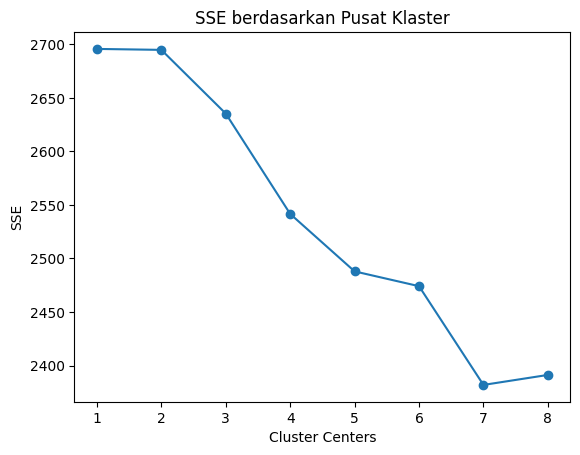

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k,
                                  init_size=1024,
                                  batch_size=256,
                                  random_state=11).fit(data).inertia_)
        print('Fit {} klaster'.format(k))
    
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    #SSE mengukur seberapa baik titik data dalam klaster tertentu dikelompokkan di sekitar pusat klaster (centroid).
    ax.set_ylabel('SSE')
    #Sum of Squared Errors (SSE)
    ax.set_title('SSE berdasarkan Pusat Klaster')
    plt.show()

find_optimal_clusters(text, 8)


In [94]:
from sklearn.cluster import MiniBatchKMeans

#Menghasilkan kluster menggunakan MiniBatchKMeans
clusters = MiniBatchKMeans(n_clusters=4, init_size=1025, batch_size=2049, 
                           random_state=11).fit_predict(text)

#Membuat DataFrame dari data teks dan kluster
text_clusters ={'text': text, 'cluster': clusters}
df_data = pd.DataFrame(text_clusters, columns=['text', 'cluster']) 
text = tfidf.inverse_transform(text) # mengubah kembali ke bentuk string
text = [' '.join(t) for t in text] # menggabungkan token menjadi kalimat
text_clusters = {'text': text, 'cluster': clusters}
df_data = pd.DataFrame (text_clusters, columns=['text', 'cluster'])

print(df_data)

df_data['cluster'].value_counts()

                                                   text  cluster
0     terus sering sendiri mohon mobile mau lot kelu...        3
1     yang ujung transfer sulit padahal nomer minta ...        3
2     udah sama ribet padahal mobile mandiri bni ban...        3
3     virtual transfer transaksi sering sedot saldo ...        3
4     ulang sulit sering sangat prose nasabah minta ...        3
...                                                 ...      ...
2863                                        keren cukup        3
2864                                     mudah aplikasi        0
2865  yang temu rekening pake padahal nomor masuk in...        3
2866                                     susah download        3
2867                                                           3

[2868 rows x 2 columns]


3    1704
1     601
0     428
2     135
Name: cluster, dtype: int64

In [95]:
def get_top_keywords(data, clusters, labels):
    data_matrix = tfidf.transform(data)
    df = pd.DataFrame(data_matrix.todense()).groupby(clusters).mean()
    for i in df.index:
        print('\nCluster {}'.format(i))
        cluster_text = df.loc[i, :]
        cluster_keywords = [labels[t] for t in np.argsort(cluster_text)]
        print(','.join(cluster_keywords))

get_top_keywords(text, clusters, tfidf.get_feature_names_out())


Cluster 0
abis,kak,kasi,kemudian,kesal,klik,kolom,komplain,ku,kudu,kuota,jt,lbh,libur,lupa,mahal,makan,makasih,topup,mantul,mbangking,min,muas,lepas,muda,jga,jdi,bukti,buku,centernya,debet,dekat,digital,dipake,dn,email,era,tuju,fasilitas,ubah,gmn,gmna,go,gopay,gratis,hubung,install,invalid,tunai,gabisa,nama,narik,ngantri,prose,ramah,rata,rb,ribu,tetep,sandi,sdah,sedang,selesai,pilih,senang,si,tengah,skrng,slalu,smga,status,sya,tabung,tagih,tahun,servernya,pergi,percuma,penting,ngecek,ngisi,nmr,nomer,nominal,notif,notifikasi,nunggu,offline,operasi,org,otomatis,otpnya,pacak,tindak,panjang,pasang,password,pasu,pay,pdahal,pdhl,pemberitahuan,bukak,bsa,ket,bri,berapa,bbrp,bru,barusan,utama,version,bakal,virtual,voucher,wa,beres,ayo,atau,apps,appnya,app,angkat,ampun,wallet,alami,yaa,aj,atmnya,best,tdak,bnyk,antar,server,belum,male,ngak,beri,masukin,repot,ujung,sekian,lihat,itnya,lanjut,nali,rumah,enak,bankingnya,kemarin,mandiri,tanya,gua,bi,pesan,ambil,dpt,bangking,aktivasinya,sedikit,aktipa

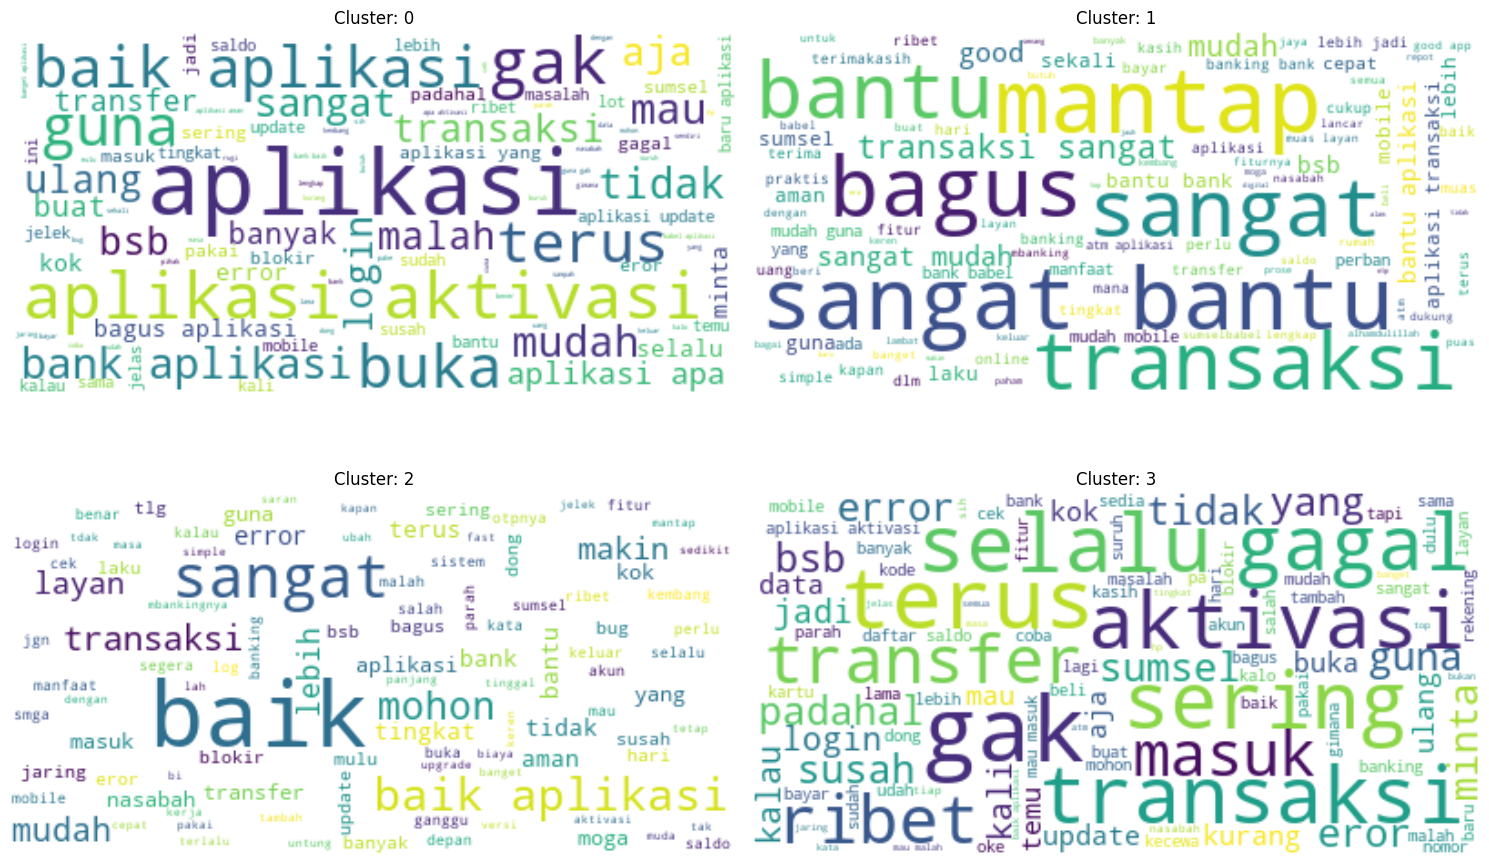

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Tentukan jumlah klaster
num_clusters = df_data['cluster'].nunique()
# Tentukan ukuran grid untuk 4 klaster
rows, cols = 2, 2
# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
# Pastikan axes adalah array 2D
axes = axes.flatten()
# Visualisasi dengan WordCloud untuk setiap klaster
for k in range(num_clusters):
    # Memfilter data untuk klaster tertentu
    cluster_data = df_data[df_data['cluster'] == k]
    # Menggabungkan teks dari semua dokumen dalam kluster menjadi satu string
    text = cluster_data['text'].str.cat(sep=' ')
    # Mengonversi teks menjadi lowercase
    text = text.lower()
    # Membuat WordCloud
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    # Menampilkan WordCloud untuk setiap klaster
    axes[k].imshow(wordcloud, interpolation="bilinear")
    axes[k].set_title(f'Cluster: {k}')
    axes[k].axis("off")
# Hapus axes yang tidak terpakai jika jumlah klaster tidak tepat mengisi grid
for i in range(num_clusters, len(axes)):
    fig.delaxes(axes[i])
# Tampilkan plot
plt.tight_layout()
plt.show()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.corpus import stopwords

# Membaca data dari file CSV
df_data = pd.read_csv('DATApreprosesing_sumselbabel.csv')

# Tentukan jumlah klaster
num_clusters = df_data['cluster'].nunique()

# Buat TF-IDF
stopwords_list = stopwords.words('english')
df_data = df_data.dropna(subset=['normalizing'])  # Pastikan tidak ada nilai NaN di kolom 'normalizing'
df_data['normalizing'] = df_data['normalizing'].astype(str)

tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.95,
    max_features=10000,
    stop_words=stopwords_list
)

text_matrix = tfidf.fit_transform(df_data['normalizing'])

# PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(text_matrix.toarray())

# Masukkan hasil PCA ke dalam DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_data['cluster']

# Plot scatter plot dengan warna berdasarkan cluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


KeyError: 'cluster'

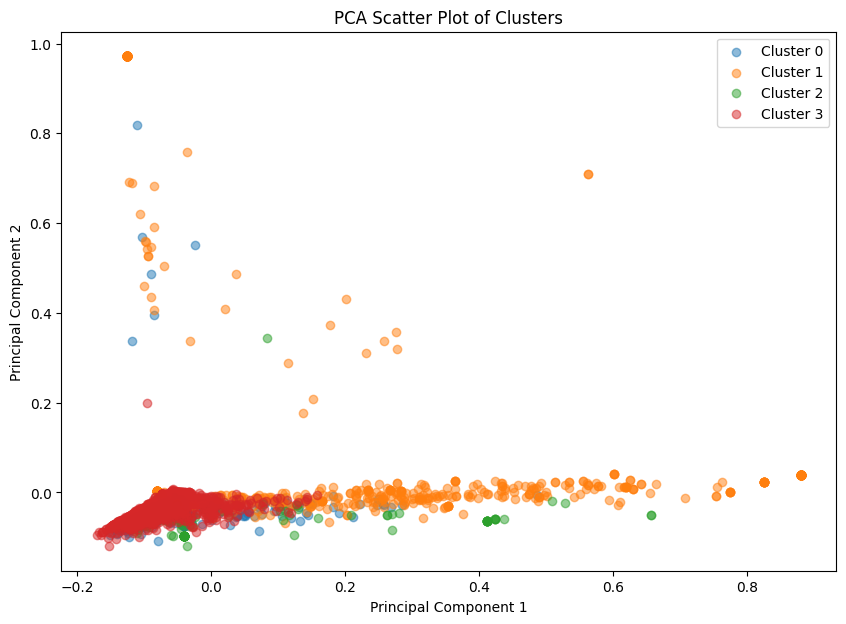

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Tentukan jumlah klaster
num_clusters = df_data['cluster'].nunique()

# Mengonversi teks ke fitur TF-IDF
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = tfidf.fit_transform(df_data['text'])

# Menggunakan PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Membuat scatter plot
plt.figure(figsize=(10, 7))

for k in range(num_clusters):
    cluster_data = X_pca[df_data['cluster'] == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {k}', alpha=0.5)

plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [66]:
df_data= pd.read_csv('cluster.csv',delimiter=';')
df_data.head()

,Unnamed: 0.1,Unnamed: 0,text,cluster,score
0,0,0,terus sering sendiri mohon mobile mau lot kelu...,3.0,2.0
1,1,1,yang ujung transfer sulit padahal nomer minta ...,3.0,1.0
2,2,2,udah sama ribet padahal mobile mandiri bni ban...,3.0,1.0
3,3,3,virtual transfer transaksi sering sedot saldo ...,3.0,1.0
4,4,4,ulang sulit sering sangat prose nasabah minta ...,3.0,3.0


In [67]:
print("Data dengan nilai NaN:")
print(df_data[df_data.isna().any(axis=1)])

Data dengan nilai NaN:
Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, text, cluster, score]
Index: []


In [68]:
# Menghapus baris yang memiliki nilai NaN pada kolom content atau label
#df_data.dropna(subset=['text', 'cluster','score'], inplace=True)

In [69]:
#df_data= pd.read_csv('Clusternan.csv',delimiter=';')
#df_data.head()

Cluster 0

Pelabelan 0

In [70]:
import pandas as pd

# Membaca data dari file CSV atau dari data yang sudah ada
df_data = pd.read_csv('cluster.csv', delimiter=';')  # Ubah 'cluster.csv' dengan nama file CSV Anda

# Fungsi untuk memberi label berdasarkan skor
def label_review(score):
    if score == 5:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

# Memberi label pada cluster 0
df_data.loc[df_data['cluster'] == 0, 'label'] = df_data[df_data['cluster'] == 0]['score'].apply(label_review)

# Memilih hanya data dari cluster 0 untuk disimpan
cluster_0_data = df_data[df_data['cluster'] == 0]

# Menghitung jumlah data dalam cluster 0
num_data_cluster_0 = len(cluster_0_data)
print(f"Jumlah data dalam cluster 0: {num_data_cluster_0}")

# Menghitung jumlah masing-masing label
label_counts = cluster_0_data['label'].value_counts()
num_positif = label_counts.get('Positif', 0)
num_netral = label_counts.get('Netral', 0)
num_negatif = label_counts.get('Negatif', 0)

print(f"Jumlah Positif: {num_positif}")
print(f"Jumlah Netral: {num_netral}")
print(f"Jumlah Negatif: {num_negatif}")

# Menampilkan beberapa ulasan dari cluster 0 dengan label
print(f"Cluster 0 with assigned labels:")
print(cluster_0_data[['text', 'score', 'label']].head())

# Menyimpan hasil dari cluster 0 ke dalam file CSV
cluster_0_data.to_csv('label_cluster0.csv', index=False)

Jumlah data dalam cluster 0: 428
Jumlah Positif: 87
Jumlah Netral: 24
Jumlah Negatif: 317
Cluster 0 with assigned labels:
                                                 text  score    label
6                            transaksi mudah aplikasi    5.0  Positif
13  sudah mau masuk mana keluar kata buka bagai ap...    2.0  Negatif
15       update terus paket masak data bulan aplikasi    3.0   Netral
16                     sering sendiri blokir aplikasi    1.0  Negatif
17  sistem masalah lumayan kelas ganggu baik bagus...    4.0   Netral


Split Data 0

In [71]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split

# Membaca data yang sudah diberi label dari file CSV
df_data = pd.read_csv('label_cluster0.csv')
                                          
X = df_data['text']
y = df_data['label']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the split data sizes
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Optional: Create a DataFrame for training and test sets for easy access
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Display a few samples from training and test sets
print("Training set samples:")
print(train_data.head())
print("\nTest set samples:")
print(test_data.head())

Training set size: 342
Test set size: 86
Training set samples:
                                                  text    label
64   untk otp mudah lebih klu hapus depan biar baya...  Positif
235         uang transaksi payah masuk keluar aplikasi  Negatif
158          tolol tidak niat kalau hapus aplikasi aja  Negatif
42   ulang registrasi mulu mintak mau kalo kali jgn...  Negatif
191       update tunggu buka bug baru banking aplikasi  Negatif

Test set samples:
                                                  text    label
261              transfer lengkap fitur bayar aplikasi  Negatif
85                 user sangat keren friendly aplikasi  Positif
422                     versi upgrade baru aplikasi ak  Negatif
95                          mudah mantab guna aplikasi  Positif
167  transaksi tambah susah sinyal sering salah pad...  Negatif


KLASIFIKASI (NAIVE BAYES) 0

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Buat pipeline dengan TF-IDF dan Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Hasil Evaluasi Model cluster 0:")
print(classification_report(y_test, y_pred))
print(f"Akurasi Model cluster 0: {accuracy_score(y_test, y_pred)}")

Hasil Evaluasi Model cluster 0:
              precision    recall  f1-score   support

     Negatif       0.83      0.98      0.90        64
      Netral       0.00      0.00      0.00         5
     Positif       0.90      0.53      0.67        17

    accuracy                           0.84        86
   macro avg       0.58      0.50      0.52        86
weighted avg       0.79      0.84      0.80        86

Akurasi Model cluster 0: 0.8372093023255814


Cluster 1

Pelabelan 1

In [73]:
import pandas as pd

# Fungsi untuk memberi label berdasarkan skor
def label_review(score):
    if score == 5:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

# Membaca data dari file CSV atau dari data yang sudah ada
df_data = pd.read_csv('cluster.csv', delimiter=';')  # Ubah 'Clusternan.csv' dengan nama file CSV Anda

# Memberi label pada cluster 1
df_data.loc[df_data['cluster'] == 1, 'label'] = df_data[df_data['cluster'] == 1]['score'].apply(label_review)

# Memilih hanya data dari cluster 1 untuk disimpan
cluster_1_data = df_data[df_data['cluster'] == 1]

# Menghitung jumlah data dalam cluster 1
num_data_cluster_1 = len(cluster_1_data)
print(f"Jumlah data dalam cluster 1: {num_data_cluster_1}")

# Menghitung jumlah masing-masing label
label_counts = cluster_1_data['label'].value_counts()
num_positif = label_counts.get('Positif', 0)
num_netral = label_counts.get('Netral', 0)
num_negatif = label_counts.get('Negatif', 0)

print(f"Jumlah Positif: {num_positif}")
print(f"Jumlah Netral: {num_netral}")
print(f"Jumlah Negatif: {num_negatif}")

# Menampilkan beberapa ulasan dari cluster 1 dengan label
print(f"Cluster 1 with assigned labels:")
print(cluster_1_data[['text', 'score', 'label']].head())

# Menyimpan hasil dari cluster 1 ke dalam file CSV
cluster_1_data.to_csv('label_cluster1.csv', index=False)

Jumlah data dalam cluster 1: 600
Jumlah Positif: 537
Jumlah Netral: 42
Jumlah Negatif: 21
Cluster 1 with assigned labels:
                                 text  score    label
7                               bagus    5.0  Positif
34                              bagus    5.0  Positif
42                             mantap    5.0  Positif
43                             mantap    5.0  Positif
46  yang sekali sangat bantu aplikasi    5.0  Positif


Split data 1

In [74]:
# Membaca data yang sudah diberi label dari file CSV
df_data = pd.read_csv('label_cluster1.csv')

# Memisahkan data menjadi fitur (X) dan label (y)
X = df_data['text']  # Variabel teks sebagai fitur
y = df_data['label']  # Label yang sudah ditentukan 

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the split data sizes
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Optional: Create a DataFrame for training and test sets for easy access
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Display a few samples from training and test sets
print("Training set samples:")
print(train_data.head())
print("\nTest set samples:")
print(test_data.head())

Training set size: 480
Test set size: 120
Training set samples:
                text    label
6       mudah mantap  Positif
532  transaksi mudah  Positif
403  utama good aman  Positif
377     sangat bantu  Positif
580             good  Positif

Test set samples:
                            text    label
183        sangat bantu aplikasi  Positif
55                        mantap  Positif
161  transaksi sangat laku bantu  Positif
35          sangat praktis bantu  Positif
1                          bagus  Positif


KLASIFIKASI (NAIVE BAYES) 1

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Buat pipeline dengan TF-IDF dan Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Hasil Evaluasi Model cluster 1:")
print(classification_report(y_test, y_pred))
print(f"Akurasi Model cluster 1: {accuracy_score(y_test, y_pred)}")

Hasil Evaluasi Model cluster 1:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         4
      Netral       0.00      0.00      0.00         9
     Positif       0.90      1.00      0.95       107

    accuracy                           0.89       120
   macro avg       0.30      0.33      0.32       120
weighted avg       0.80      0.89      0.84       120

Akurasi Model cluster 1: 0.8916666666666667


CLUSTER 2

Pelabelan 2

In [76]:
import pandas as pd

# Membaca data dari file CSV atau dari data yang sudah ada
df_data = pd.read_csv('Clusternan.csv', delimiter=';')  # Ubah 'Clusternan.csv' dengan nama file CSV Anda

# Fungsi untuk memberi label berdasarkan skor
def label_review(score):
    if score == 5:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

# Memberi label pada cluster 2
df_data.loc[df_data['cluster'] == 2, 'label'] = df_data[df_data['cluster'] == 2]['score'].apply(label_review)

# Memilih hanya data dari cluster 2 untuk disimpan
cluster_2_data = df_data[df_data['cluster'] == 2]

# Menghitung jumlah data dalam cluster 2
num_data_cluster_2 = len(cluster_2_data)
print(f"Jumlah data dalam cluster 2: {num_data_cluster_2}")

# Menghitung jumlah masing-masing label
label_counts = cluster_2_data['label'].value_counts()
num_positif = label_counts.get('Positif', 0)
num_netral = label_counts.get('Netral', 0)
num_negatif = label_counts.get('Negatif', 0)

print(f"Jumlah Positif: {num_positif}")
print(f"Jumlah Netral: {num_netral}")
print(f"Jumlah Negatif: {num_negatif}")

# Menampilkan beberapa ulasan dari cluster 2 dengan label
print(f"Cluster 2 with assigned labels:")
print(cluster_2_data[['text', 'score', 'label']].head())

# Menyimpan hasil dari cluster 2 ke dalam file CSV
cluster_2_data.to_csv('label_cluster2.csv', index=False)


Jumlah data dalam cluster 2: 135
Jumlah Positif: 88
Jumlah Netral: 16
Jumlah Negatif: 31
Cluster 2 with assigned labels:
                              text  score    label
20                            baik    5.0  Positif
32       sangat manfaat bantu baik    4.0   Netral
38             mobile banking baik    5.0  Positif
45  update makin kembang hari baik    5.0  Positif
49             kerja baik aplikasi    5.0  Positif


Split Data 2

In [77]:
from sklearn.model_selection import train_test_split

# Membaca data yang sudah diberi label dari file CSV
df_data = pd.read_csv('label_cluster2.csv')
                                          
X = df_data['text']
y = df_data['label']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran set latih dan uji
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Menampilkan beberapa sampel dari set latih dan uji
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

print("Training set samples:")
print(train_data.head())
print("\nTest set samples:")
print(test_data.head())

Training set size: 108
Test set size: 27
Training set samples:
                                                  text    label
26                         transaksi sangat mudah baik  Positif
109                                        baik apknya  Negatif
51   versi upgrade ubah tak sering saldo pulsa moho...   Netral
76                                                baik   Netral
132                                               baik  Negatif

Test set samples:
                                                  text    label
134                                      smga lbh baik  Positif
97   yang susah sangat salah pin masuk kantor kali ...  Negatif
124  temu semua sangat perlu parah pagi nasabah moh...  Negatif
4                                  kerja baik aplikasi  Positif
63                                         sekali baik  Positif


KLASIFIKASI (NAIVE BAYES) 2

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Buat pipeline dengan TF-IDF dan Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Hasil Evaluasi Model cluster 2:")
print(classification_report(y_test, y_pred))
print(f"Akurasi Model cluster 2: {accuracy_score(y_test, y_pred)}")

Hasil Evaluasi Model cluster 2:
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         6
      Netral       0.00      0.00      0.00         3
     Positif       0.67      1.00      0.80        18

    accuracy                           0.67        27
   macro avg       0.22      0.33      0.27        27
weighted avg       0.44      0.67      0.53        27

Akurasi Model cluster 2: 0.6666666666666666


Cluster 3

Pelabelan 3

In [79]:
import pandas as pd

# Membaca data dari file CSV atau dari data yang sudah ada
df_data = pd.read_csv('Clusternan.csv', delimiter=';')  # Ubah 'Clusternan.csv' dengan nama file CSV Anda

# Fungsi untuk memberi label berdasarkan skor
def label_review(score):
    if score == 5:
        return 'Positif'
    elif score >= 3:
        return 'Netral'
    else:
        return 'Negatif'

# Memberi label pada cluster 3
df_data.loc[df_data['cluster'] == 3, 'label'] = df_data[df_data['cluster'] == 3]['score'].apply(label_review)

# Memilih hanya data dari cluster 3 untuk disimpan
cluster_3_data = df_data[df_data['cluster'] == 3]

# Menghitung jumlah data dalam cluster 3
num_data_cluster_3 = len(cluster_3_data)
print(f"Jumlah data dalam cluster 3: {num_data_cluster_3}")

# Menghitung jumlah masing-masing label
label_counts = cluster_3_data['label'].value_counts()
num_positif = label_counts.get('Positif', 0)
num_netral = label_counts.get('Netral', 0)
num_negatif = label_counts.get('Negatif', 0)

print(f"Jumlah Positif: {num_positif}")
print(f"Jumlah Netral: {num_netral}")
print(f"Jumlah Negatif: {num_negatif}")

# Menampilkan beberapa ulasan dari cluster 3 dengan label
print(f"Cluster 3 with assigned labels:")
print(cluster_3_data[['text', 'score', 'label']].head())

# Menyimpan hasil dari cluster 3 ke dalam file CSV
cluster_3_data.to_csv('label_cluster3.csv', index=False)

Jumlah data dalam cluster 3: 1622
Jumlah Positif: 328
Jumlah Netral: 207
Jumlah Negatif: 1087
Cluster 3 with assigned labels:
                                                text  score    label
0  terus sering sendiri mohon mobile mau lot kelu...    2.0  Negatif
1  yang ujung transfer sulit padahal nomer minta ...    1.0  Negatif
2  udah sama ribet padahal mobile mandiri bni ban...    1.0  Negatif
3  virtual transfer transaksi sering sedot saldo ...    1.0  Negatif
4  ulang sulit sering sangat prose nasabah minta ...    3.0   Netral


Split Data 3

In [80]:
from sklearn.model_selection import train_test_split

# Membaca data yang sudah diberi label dari file CSV
df_data = pd.read_csv('label_cluster3.csv')
                                          
X = df_data['text']
y = df_data['label']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran set latih dan uji
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Menampilkan beberapa sampel dari set latih dan uji
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

print("Training set samples:")
print(train_data.head())
print("\nTest set samples:")
print(test_data.head())

Training set size: 1297
Test set size: 325
Training set samples:
                                                   text    label
447   user uang tiba terus paksa pakek nya nasabah m...  Negatif
688   yang pulsa nomor ngak malah kirim hilang gopay...  Positif
216   yang tidak terus solusi sinyal sim sendiri rib...  Negatif
1569  terus susah padahal login loading jaring hp ba...  Negatif
1353        suruh mulu malah eror dong benerin aktivasi  Negatif

Test set samples:
                                                   text    label
1190  yang transaksi skrng mudah mobile lebih lanjut...   Netral
1111  ujung transaksi server sedang pa jelek jelas e...  Negatif
718                                           suka eror  Negatif
1054                                              jelek  Negatif
1292                                             daftar  Negatif


KLASIFIKASI (NAIVE BAYES) 3

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# Buat pipeline dengan TF-IDF dan Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Hasil Evaluasi Model cluster 3:")
print(classification_report(y_test, y_pred))
print(f"Akurasi Model cluster 3: {accuracy_score(y_test, y_pred)}")

Hasil Evaluasi Model cluster 3:
              precision    recall  f1-score   support

     Negatif       0.77      0.99      0.87       218
      Netral       1.00      0.05      0.09        41
     Positif       0.82      0.55      0.65        66

    accuracy                           0.78       325
   macro avg       0.86      0.53      0.54       325
weighted avg       0.81      0.78      0.73       325

Akurasi Model cluster 3: 0.7815384615384615


--------------------------------------------------------------------------------------------------------------------------------------

BATASS


analisis

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for cluster in df_data['cluster'].unique():
    cluster_data = df_data[df_data['cluster'] == cluster]
    top_words = get_top_n_words(cluster_data['text'], 10)
    print(f"Cluster {cluster} top words:")
    print(top_words)
    print("\n")


Cluster 3.0 top words:
[('aktivasi', 351), ('bank', 302), ('mau', 259), ('tidak', 233), ('aplikasi', 220), ('masuk', 200), ('terus', 199), ('ulang', 194), ('gak', 184), ('baik', 172)]




In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_tfidf_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    tfidf_matrix = vec.transform(corpus)
    sum_tfidf = tfidf_matrix.sum(axis=0) 
    words_tfidf = [(word, sum_tfidf[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_tfidf = sorted(words_tfidf, key = lambda x: x[1], reverse=True)
    return words_tfidf[:n]

for cluster in df_data['cluster'].unique():
    cluster_data = df_data[df_data['cluster'] == cluster]
    top_tfidf_words = get_top_n_tfidf_words(cluster_data['text'], 10)
    print(f"Cluster {cluster} top TF-IDF words:")
    print(top_tfidf_words)
    print("\n")


Cluster 3.0 top TF-IDF words:
[('aktivasi', 77.71320483082857), ('terus', 51.1963210789487), ('bank', 51.00171866742479), ('mau', 49.39230540892589), ('tidak', 46.94743184494838), ('ulang', 43.95619331274545), ('gak', 43.6792292327488), ('masuk', 40.448512948137335), ('login', 40.2944054361603), ('transfer', 37.841561586610354)]




In [84]:
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_topics = 5
no_top_words = 10

for cluster in df_data['cluster'].unique():
    cluster_data = df_data[df_data['cluster'] == cluster]
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['text'])
    lda = LatentDirichletAllocation(n_components=no_topics, random_state=42)
    lda.fit(tfidf_matrix)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    print(f"Cluster {cluster} topics:")
    display_topics(lda, tfidf_feature_names, no_top_words)
    print("\n")

Cluster 3.0 topics:
Topic 0:
kasih bank jelek bintang yang sumsel gak manfaat banyak muas
Topic 1:
eror bsb sering tambah fitur bayar tingkat mobile bagus best
Topic 2:
saldo keren suka transfer gagal tidak pulsa terus transaksi potong
Topic 3:
aktivasi ulang mau login malah oke minta gak terus susah
Topic 4:
lancar lot sumsel aman lelet terus cepat moga makin babel




In [85]:
def determine_review_type(top_words):
    if 'error' in top_words or 'lelet' in top_words:
        return 'Masalah Teknis'
    elif 'bagus' in top_words or 'jelek' in top_words:
        return 'Kemudahan Penggunaan'
    elif 'aktivasi' in top_words or 'ribet' in top_words:
        return 'Fitur'
    else:
        return 'Lainnya'

for cluster in df_data['cluster'].unique():
    cluster_data = df_data[df_data['cluster'] == cluster]
    top_words = [word for word, _ in get_top_n_words(cluster_data['text'], 10)]
    review_type = determine_review_type(top_words)
    print(f"Cluster {cluster} review type: {review_type}")
    print("\n")


Cluster 3.0 review type: Fitur


